In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn
import cv2

C:\Users\maria\AppData\Local\Temp\ipykernel_17360\661433407.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


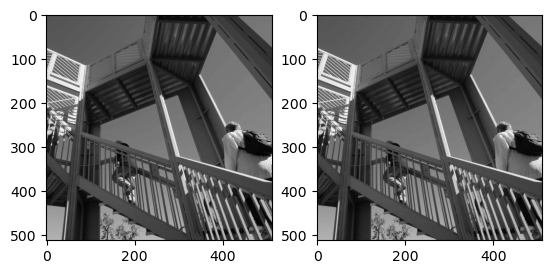

In [2]:
X = misc.ascent()

# sarcina 1

Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

def jpeg_encoding(X):
    r, c = X.shape
    r8 = int(np.ceil(r/8) * 8)
    c8 = int(np.ceil(c/8) * 8)
    
    padding_r = r8 - r 
    padding_c = c8 - c
    
    X_ext = cv2.copyMakeBorder(X, 0, padding_c, 0, padding_r, cv2.BORDER_CONSTANT, value=0)
    
    # y_nnz = 0
    # y_jpeg_nnz = 0
    Y_jpeg = np.zeros_like(X_ext)
    for i in range(int(r8/8)):
        for j in range(int(c8/8)):
            x = X_ext[8*i:8*i + 8, 8*j:8*j + 8]
            y = dctn(x)
            # y_nnz += np.count_nonzero(y)
            
            y_jpeg = Q_jpeg*np.round(y/Q_jpeg)
            # y_jpeg_nnz += np.count_nonzero(y_jpeg)
            
            Y_jpeg[8*i:8*i + 8, 8*j:8*j + 8] = y_jpeg

    # TODO: Huffman coding
    
    return Y_jpeg

def jpeg_decoding(Y):
    r, c = Y.shape

    # TODO: Huffman decoding
    
    X_jpeg = np.zeros_like(Y)
    for i in range(int(r/8)):
        for j in range(int(c/8)):
            y = Y[8*i:8*i + 8, 8*j:8*j + 8]
            x_jpeg = idctn(y)
            
            X_jpeg[8*i:8*i + 8, 8*j:8*j + 8] = x_jpeg
    
    return X_jpeg    
   


# print(y_nnz, y_jpeg_nnz)

Y_jpeg = jpeg_encoding(X)
X_jpeg = jpeg_decoding(Y_jpeg)


plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.show()

